# Tracking learning

While training the model, the weights in the model would change. As the weights change, the network becomes more attuned to the features of the images that discrimnate between classes, and it means the loss function becomes smaller and smaller

因此可以透過檢視每次loss function的值來評估模型是否足夠好

The example graph shows the categorical cross-entropy loss in the network (comparing between training dataset and validation_split dataset)
![](Image/Image11.jpg)

可以看出overfitting的現象

## Tracking the loss function in Keras

Loading the dataset

In [3]:
# An example of one-hot encoding
import numpy as np

def dummies(n, labels):
    # The number of image categories
    n_categories = n

    # The unique values of categories in the data
    categories = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    # Initialize ohe_labels as all zeros
    ohe_labels = np.zeros((len(labels), n_categories))

    # Loop over the labels
    for ii in range(len(labels)):
        # Find the location of this label in the categories variable
        jj = np.where(labels[ii] == categories)
        # Set the corresponding zero to one
        ohe_labels[ii,jj] = 1

    return ohe_labels

In [4]:
import pandas as pd
data = pd.read_csv("MNIST dataset\\mnist.csv", header=None)
X = data.drop(0, axis = 1).to_numpy()
y_raw = data[0].to_numpy()
y = dummies(10, y_raw)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=21)

In [8]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [9]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(160, activation = 'relu', input_shape = (784,)))

# Add the second hidden layer
model.add(Dense(100, activation = 'relu'))

# Add the third hidden layer
#model.add(Dense(50, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Set up Early Stopping Monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
training = model.fit(X_train, y_train, validation_split = 0.3, epochs = 20, callbacks = [early_stopping_monitor])

Train on 1120 samples, validate on 480 samples
Epoch 1/20
1120/1120 [==============================] - 0s 281us/step - loss: 20.8434 - accuracy: 0.5616 - val_loss: 8.2814 - val_accuracy: 0.7417
Epoch 2/20
1120/1120 [==============================] - 0s 56us/step - loss: 3.4228 - accuracy: 0.8393 - val_loss: 5.5508 - val_accuracy: 0.7896
Epoch 3/20
1120/1120 [==============================] - 0s 76us/step - loss: 1.4160 - accuracy: 0.9098 - val_loss: 5.2529 - val_accuracy: 0.8021
Epoch 4/20
1120/1120 [==============================] - 0s 76us/step - loss: 0.4379 - accuracy: 0.9545 - val_loss: 5.2970 - val_accuracy: 0.8167
Epoch 5/20
1120/1120 [==============================] - 0s 76us/step - loss: 0.4308 - accuracy: 0.9643 - val_loss: 5.1064 - val_accuracy: 0.8083
Epoch 6/20
1120/1120 [==============================] - 0s 76us/step - loss: 0.4136 - accuracy: 0.9571 - val_loss: 4.8979 - val_accuracy: 0.8333
Epoch 7/20
1120/1120 [==============================] - 0s 70us/step - loss: 0.27

Prediction

In [14]:
classified_digits = model.predict_classes(X_test)
y_pred = dummies(10, classified_digits)

In [16]:
number_correct = (y_pred*y_test).sum()
print(number_correct)
accuracy = number_correct/len(y_pred)
print("The prediction accuracy of the handwritten-digit recognition model is " + str(round(accuracy*100, 3)) + "%")

343.0
The prediction accuracy of the handwritten-digit recognition model is 85.536%


Plot the loss function of training set and validation set

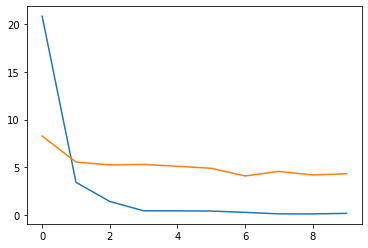

In [10]:
import matplotlib.pyplot as plt
plt.plot(training.history["loss"])
plt.plot(training.history["val_loss"])
plt.show()

Save the model

In [11]:
from keras.models import load_model
model.save('Model_saved/Handwritten_digit_classification.h5')

## Use the best parameters before the network starts overfitting 

使用一種Callback function (callback function會在每次epoch跑完後就執行一次，目的去檢查是否訓練可以停下)

checkpoint會去紀錄模型訓練過程中最低的loss值，只要發現loss值降低就會更新

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('weights.hdf5', monitor = 'val_loss', save_best_only = True)

Fit the model again using the new callback

In [18]:
# Fit the model again
training = model.fit(X_train, y_train, validation_split = 0.3, epochs = 20, callbacks = [early_stopping_monitor, checkpoint])

Train on 1120 samples, validate on 480 samples
Epoch 1/20
1120/1120 [==============================] - 0s 84us/step - loss: 0.2480 - accuracy: 0.9857 - val_loss: 5.3355 - val_accuracy: 0.8333
Epoch 2/20
1120/1120 [==============================] - 0s 62us/step - loss: 0.3575 - accuracy: 0.9714 - val_loss: 5.3828 - val_accuracy: 0.8146
Epoch 3/20
1120/1120 [==============================] - 0s 62us/step - loss: 0.2502 - accuracy: 0.9804 - val_loss: 4.3039 - val_accuracy: 0.8583
Epoch 4/20
1120/1120 [==============================] - 0s 62us/step - loss: 0.2771 - accuracy: 0.9786 - val_loss: 5.7710 - val_accuracy: 0.8417
Epoch 5/20
1120/1120 [==============================] - 0s 62us/step - loss: 0.4747 - accuracy: 0.9705 - val_loss: 4.5991 - val_accuracy: 0.8417
Epoch 6/20
1120/1120 [==============================] - 0s 76us/step - loss: 0.3286 - accuracy: 0.9795 - val_loss: 5.4381 - val_accuracy: 0.8479


### Load the best weights with the lowest loss value

In [21]:
model.load_weights("weights.hdf5")

Prediction

In [23]:
classified_digits = model.predict_classes(X_test)
y_pred = dummies(10, classified_digits)
number_correct = (y_pred*y_test).sum()
print(number_correct)
accuracy = number_correct/len(y_pred)
print("The prediction accuracy of the handwritten-digit recognition model is " + str(round(accuracy*100, 3)) + "%")

351.0
The prediction accuracy of the handwritten-digit recognition model is 87.531%


The accuracy is improved

---

# Regularisation

Two major strategies of regularisation:
1. Dropout
2. Batch Normalisation

## Dropout

In each step of learning, we randomly choose a subset of the units in a layer and ignore it

Concept Visualisation:
![](Image/Image12.jpg)

This technique allows us to train different networks on different parts of the data. Therefore, if part of the network is too sensitive to some noise in the data, other parts will compensate for it.

## Dropout in Keras

Dropout is implemented as a layer. We add a layer after the layer we want units ignored.

In each dropout layer, we have to specify the proportion of the units in the layer to ignore in each learning step

In [1]:
# Import dropout layers
from keras.layers import Dropout


from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [6]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(160, activation = 'relu', input_shape = (784,)))

# ==== Dropout ====
# Dropout 0.25 units in each step
model.add(Dropout(0.25))

# The rest of the model remains the same
# Add the second hidden layer
model.add(Dense(100, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Set up Early Stopping Monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
training = model.fit(X_train, y_train, validation_split = 0.3, epochs = 20, callbacks = [early_stopping_monitor])

Train on 1120 samples, validate on 480 samples
Epoch 1/20
1120/1120 [==============================] - 1s 1ms/step - loss: 33.8432 - accuracy: 0.4643 - val_loss: 8.9746 - val_accuracy: 0.7167
Epoch 2/20
1120/1120 [==============================] - 0s 73us/step - loss: 8.8530 - accuracy: 0.7080 - val_loss: 6.4547 - val_accuracy: 0.7500
Epoch 3/20
1120/1120 [==============================] - 0s 75us/step - loss: 4.3794 - accuracy: 0.7929 - val_loss: 3.9738 - val_accuracy: 0.7896
Epoch 4/20
1120/1120 [==============================] - 0s 73us/step - loss: 3.0876 - accuracy: 0.8098 - val_loss: 3.5348 - val_accuracy: 0.8021
Epoch 5/20
1120/1120 [==============================] - 0s 81us/step - loss: 2.3597 - accuracy: 0.8259 - val_loss: 3.3188 - val_accuracy: 0.8354
Epoch 6/20
1120/1120 [==============================] - 0s 80us/step - loss: 1.7177 - accuracy: 0.8705 - val_loss: 2.9807 - val_accuracy: 0.8333
Epoch 7/20
1120/1120 [==============================] - 0s 81us/step - loss: 1.4173

In [8]:
classified_digits = model.predict_classes(X_test)
y_pred = dummies(10, classified_digits)
number_correct = (y_pred*y_test).sum()
print(number_correct)
accuracy = number_correct/len(y_pred)
print("The prediction accuracy of the handwritten-digit recognition model is " + str(round(accuracy*100, 3)) + "%")

334.0
The prediction accuracy of the handwritten-digit recognition model is 83.292%


---

## Batch Normalisation

Standardise the output of a specified layer to have 0 mean and standard deviation of 1

Different batches of input might produce wildly different distributions of outputs in any given layer in the network.

## Batch Normalisation in Keras

This technique is also implemented as layers in Keras. <br/>
We add a layer after the layer we want to scale the output.

In [10]:
# Import dropout layers
from keras.layers import BatchNormalization


from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

In [11]:
# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(160, activation = 'relu', input_shape = (784,)))

# ==== Batch Normalization ====
# Normalise the output of the previous layer
model.add(BatchNormalization())

# The rest of the model remains the same
# Add the second hidden layer
model.add(Dense(100, activation = 'relu'))

# Add the output layer
model.add(Dense(10, activation = 'softmax'))

# Compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Set up Early Stopping Monitor
early_stopping_monitor = EarlyStopping(patience = 3)

# Fit the model
training = model.fit(X_train, y_train, validation_split = 0.3, epochs = 20, callbacks = [early_stopping_monitor])

Train on 1120 samples, validate on 480 samples
Epoch 1/20
1120/1120 [==============================] - 1s 562us/step - loss: 1.1503 - accuracy: 0.6464 - val_loss: 0.7172 - val_accuracy: 0.7979
Epoch 2/20
1120/1120 [==============================] - 0s 82us/step - loss: 0.3273 - accuracy: 0.9250 - val_loss: 0.5120 - val_accuracy: 0.8479
Epoch 3/20
1120/1120 [==============================] - 0s 84us/step - loss: 0.1798 - accuracy: 0.9696 - val_loss: 0.4026 - val_accuracy: 0.8854
Epoch 4/20
1120/1120 [==============================] - 0s 83us/step - loss: 0.1097 - accuracy: 0.9821 - val_loss: 0.3892 - val_accuracy: 0.8771
Epoch 5/20
1120/1120 [==============================] - 0s 78us/step - loss: 0.0697 - accuracy: 0.9902 - val_loss: 0.3470 - val_accuracy: 0.8792
Epoch 6/20
1120/1120 [==============================] - 0s 76us/step - loss: 0.0511 - accuracy: 0.9946 - val_loss: 0.3390 - val_accuracy: 0.8896
Epoch 7/20
1120/1120 [==============================] - 0s 78us/step - loss: 0.028

In [12]:
classified_digits = model.predict_classes(X_test)
y_pred = dummies(10, classified_digits)
number_correct = (y_pred*y_test).sum()
print(number_correct)
accuracy = number_correct/len(y_pred)
print("The prediction accuracy of the handwritten-digit recognition model is " + str(round(accuracy*100, 3)) + "%")

357.0
The prediction accuracy of the handwritten-digit recognition model is 89.027%


## The disharmony between Batch Normalisation and Dropout

Sometimes, dropout and batch normalisation do not work well together.

Dropout tends to **slow down** the learning process (more careful), while batch normalisation tends to make training processes **faster**. Therefore, when we use both techniques simultaneously, they may produce a worse result than the model without regularisation.

---

# Interpretation of models

Visualisating what different parts of the network are doing: Select a particular part of a convolutional network and analyse its behaviour.

Once the model is compiled, it will store its layers in an attribute called "layers" in the model object. This attribute is a list of layer objects.

## Look deeper in each layer in Keras

In [15]:
# import convolution layers in 2-Dimensional image
from keras.layers import Conv2D
from keras.layers import BatchNormalization

# Use a Flatten layer to be like a bridge between a convolution layer and a dense layer
from keras.layers import Flatten

# Other modules are the same
from keras.layers import Dense
from keras.models import Sequential    # 仍然使用Sequential model
import numpy as np
import pandas as pd

In [16]:
model = Sequential()

# first cnn layer
model.add(Conv2D(10, kernel_size = 2, activation = 'relu', input_shape = (28, 28, 1), padding = 'same'))

# Batch normalisation
model.add(BatchNormalization())

# second cnn layer
model.add(Conv2D(10, kernel_size = 2, activation = 'relu'))

# Flatten layer
model.add(Flatten())

# Output layer
model.add(Dense(3, activation = 'softmax'))

# Compile th model
model.compile(optimizer = 'adam', loss = "categorical_crossentropy", metrics = ['accuracy'])

In [17]:
model.layers

In [21]:
FirstConvlayer = model.layers[0]
FirstConvlayer

Get weights of a layer

In [26]:
# get_weights function will return an object contains two components.
weights_FirstConvlayer = FirstConvlayer.get_weights()
print(len(weights_FirstConvlayer))

# The first component: an array holds the values of the weights for the convolutional kernels for this layer
print(weights_FirstConvlayer[0])
weights_FirstConvlayer[0].shape
# The first two dimensions denote the kernel size
# The third dimension denotes the number of channels in the kernels. Here the value is 1 because the model is looking at black and white data
# The last dimension denotes the number of kernels in this layer

2
[[[[ 0.27411816 -0.30638087  0.2665628   0.0738984   0.14653984
     0.3596767   0.19624433  0.27652887 -0.05711189  0.10905865]]

  [[-0.16108902 -0.1684348   0.03092727 -0.28043404 -0.0913468
     0.28214476  0.25788632 -0.3375675  -0.00346699  0.00801867]]]


 [[[ 0.32791778  0.06103742  0.10251573  0.29084352 -0.05236503
    -0.02372387 -0.07497877  0.1488047   0.27222177 -0.04544511]]

  [[-0.16969731  0.07483253 -0.3614863   0.12685612 -0.3161542
    -0.15200064  0.22860458 -0.09235242 -0.08514249  0.2522103 ]]]]


(2, 2, 1, 10)

Pull out the first kernel in this layer

In [28]:
layer1 = weights_FirstConvlayer[0]
kernel1_L1 = layer1[:,:,0,0]
print(kernel1_L1.shape)
kernel1_L1

(2, 2)


array([[ 0.27411816, -0.16108902],
       [ 0.32791778, -0.16969731]], dtype=float32)

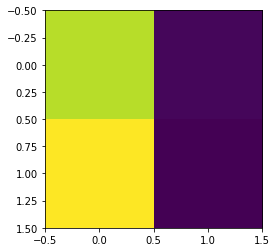

In [29]:
import matplotlib.pyplot as plt
plt.imshow(kernel1_L1)

1. 透過kernel的視覺化來詮釋此kernel的功用是什麼 (負責identify點、垂直線、水平線或更複雜的物件)
2. 可以將這個kernel跑過一張image然後visulise結果，看看結果跟原始圖片的差異


Example:

![](Image/Image13.jpg)

![](Image/Image14.jpg)

It seems that this kernel is effective in identifying the external edges of this image on the left

In [32]:
# ==== Visualise the function of a kernel ====
kernel1_L1

def Convolution(image, kernel):
    # Create the result matrix
    res = np.zeros(image.shape[0], image.shape[1])

    # Iteratively moving the kernel over the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = image[i:i+2, j:j+2]    # Specify a window (size equals to size of kernel), moving with the kernel
            res[i, j] = (kernel * window).sum()

(2, 2)
[[-0.30638087 -0.1684348 ]
 [ 0.06103742  0.07483253]]


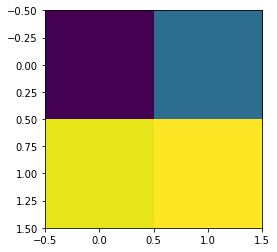

In [35]:
# The second kernel in the first layer
kernel2_L1 = layer1[:,:,0,1]
print(kernel2_L1.shape)
print(kernel2_L1)
plt.imshow(kernel2_L1)